# Classification Task

You have images from a GHz scanner with two relevant layers:
- An upper layer (capturing the surface details of the cardboard box and leaflet)
- A lower layer (focusing on the syringe compartment)

The images show two classes: samples with the syringe present versus absent, with slight positional shifts due to the sample not always being perfectly aligned.

![Screenshot from 2025-02-18 21-31-54.png](<attachment:Screenshot from 2025-02-18 21-31-54.png>)
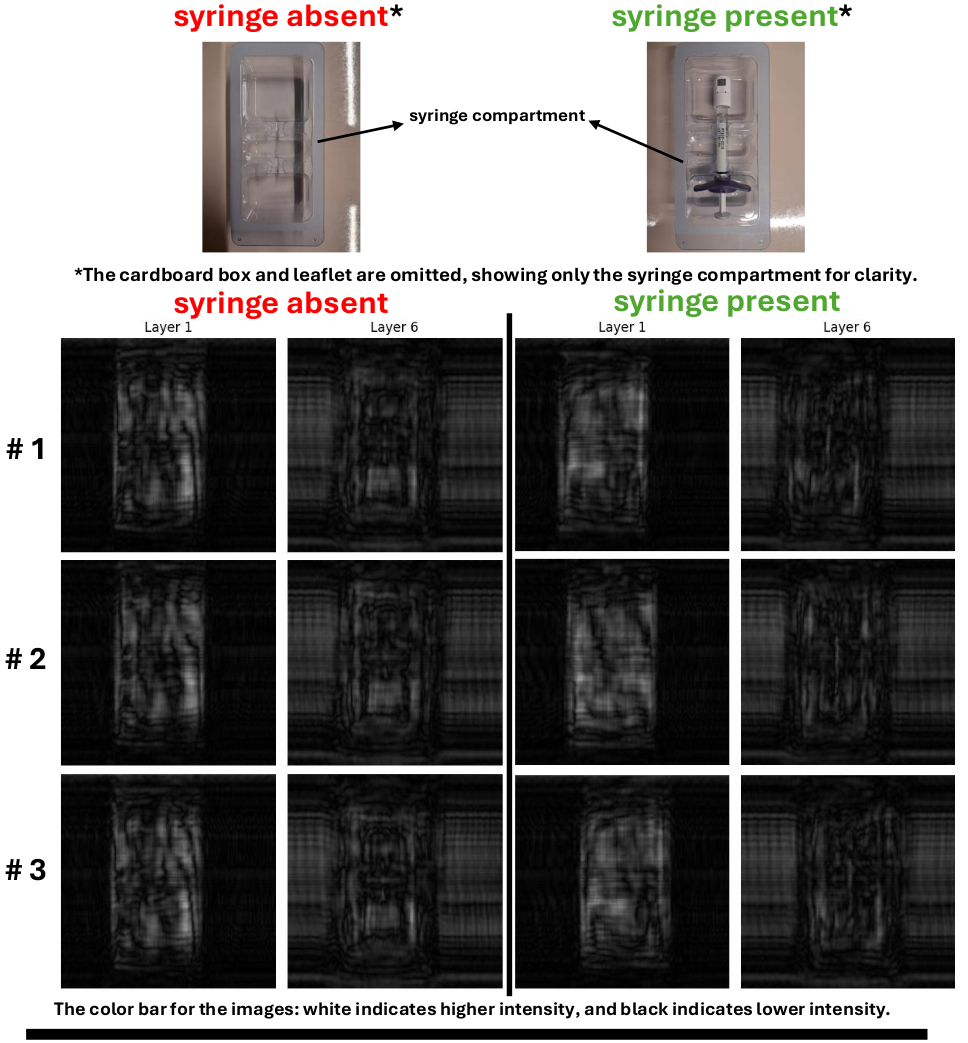

## 1. End-to-End CNN Classification
One straightforward approach is to use a deep convolutional neural network (CNN) that takes the image as input and outputs a binary classification.

Method:
- Input Handling: Combine the two layers into a multi-channel image (e.g., treat the upper and lower layers as separate channels in a 2-channel input) or stack them along with additional pre-processed channels.
- Model Architecture: Fine-tune a pre-trained CNN (like ResNet, EfficientNet) to classify the images as “syringe present” or “syringe absent”.
- Training Considerations:
       - Use data augmentation (random crops, rotations, translations) to account for the shifts in sample positions.
        - Fine-tuning a pre-trained model can be beneficial if your dataset isn’t huge.
- Advantages:
    Leverages state-of-the-art architectures and transfer learning.
    Minimal manual feature engineering.
- Limitations:
    Requires a sufficiently large labeled dataset or careful regularization when data is limited.
    May struggle if the two layers have very different characteristics unless the model is designed to handle multi-modal inputs.

2. Two-Stream Network with Feature Fusion
Given the distinct information in the two layers, you might benefit from processing them separately at first and then fusing their features later in the network.

    Method:
        Separate Branches: Use two CNN branches—one for the upper layer and one for the lower layer.
        Feature Fusion: Merge the outputs (via concatenation or element-wise operations) before passing them through fully connected layers for final classification.
        Training Considerations:
            Can allow each branch to learn features specific to its layer’s characteristics.
            Data alignment and ensuring the spatial correspondence between the layers might need extra attention.
    Advantages:
        Tailored feature extraction per layer may capture subtle differences more effectively.
    Limitations:
        More complex architecture that might require more data or careful tuning to avoid overfitting.

3. Vision Transformers (ViT) & Hybrid Models

    Vision Transformers (ViT):
    Rather than using traditional CNNs, ViTs break an image into patches and process them with self‐attention layers. They’ve shown remarkable performance on image classification tasks, particularly when combined with transfer learning.
    Recent variants like the Swin Transformer and DeiT improve efficiency and incorporate hierarchical features that make them robust to positional shifts and scale variations.
    en.wikipedia.org

    Hybrid CNN-Transformer Architectures:
    Models that integrate CNN layers for early feature extraction followed by transformer layers for global context have proven effective. This combination leverages the inductive biases of CNNs with the long-range dependency modeling of transformers.

4. Self-Supervised and Contrastive Learning

    Self-Supervised Pretraining:
    Techniques such as DINO, DINOv2, MoCo, and BYOL allow the model to learn strong feature representations without heavy reliance on labeled data. Once pre-trained, you can fine-tune these models on your specific classification task.
    These methods can also provide robust representations that are less sensitive to variations in position and lighting.

5. Siamese Networks:
Siamese networks can learn to compare the similarity between two input images (Layer 1 and Layer 6) and classify based on their relationship.

Two identical CNNs processing Layer 1 and Layer 6 images independently.

Compute a distance metric (e.g., Euclidean distance) between the feature vectors produced by the two CNNs.

Feed this distance metric into a fully connected layer for final classification



Advantage: Useful if the relationship between Layer 1 and Layer 6 is crucial for determining the presence of a syringe.

## Counting task
You have images where 9 glass vials are randomly placed inside a cardboard package. In a larger dataset, you need to count the total number of vials per image.

1. Object Detection with Deep Learning
Train an object detector to identify each vial.

    Method:
        Model Choice: Use models such as YOLO, Faster R-CNN, or SSD.
        Training: Annotate a sufficient number of images with bounding boxes around each vial and train the model.
        Counting: Once detections are made, simply count the number of bounding boxes.
    Advantages:
        Robust to variations in position and scale.
        Provides localization which can be useful for further analysis.
    Limitations:
        Requires bounding box annotations which can be time-consuming to create.
        Overlapping vials might be challenging unless the detector is well-tuned.

2. Instance Segmentation
Use instance segmentation to segment each vial individually.

    Method:
        Model Choice: Use Mask R-CNN to obtain segmentation masks for each vial.
        Counting: Count the number of segmented instances.
    Advantages:
        Better performance when vials are overlapping or in close proximity.
        Provides pixel-level segmentation that might be useful for quality control.
    Limitations:
        More computationally intensive than simple detection.
        Requires more detailed annotations (pixel-level masks).

3. Regression-Based Counting using Density Maps
This method is inspired by techniques used in crowd counting.

    Method:
        Model Choice: Train a CNN to predict a density map from the input image.
        Counting: The integral (sum) of the density map over the image gives an estimate of the number of vials.
    Advantages:
        Can handle cases where objects are densely packed or occluded.
        Doesn’t require explicit bounding boxes—point annotations can suffice.
    Limitations:
        Building and training the density map model can be complex.
        The accuracy depends on the quality of the density map estimation and might need careful calibration.

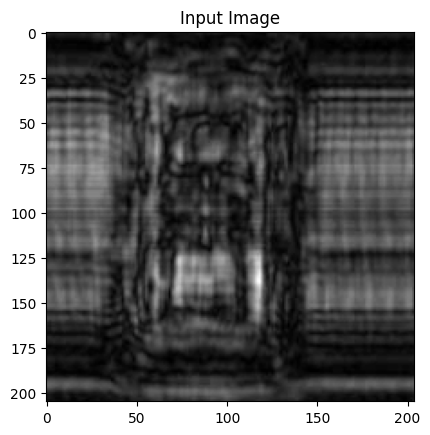

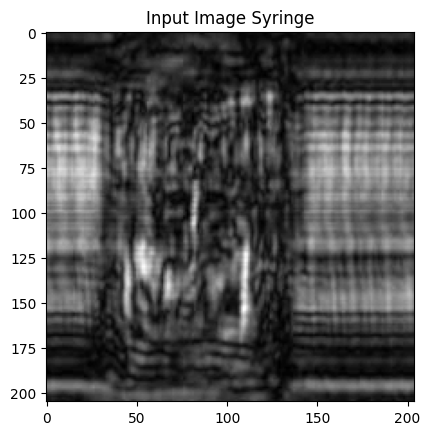

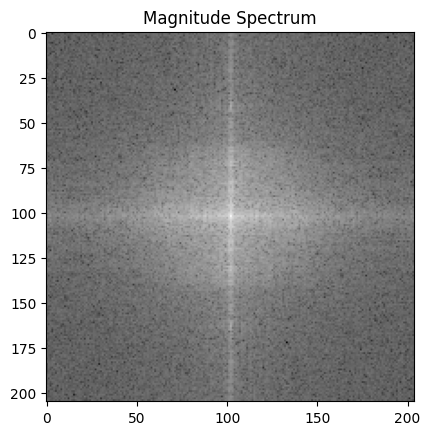

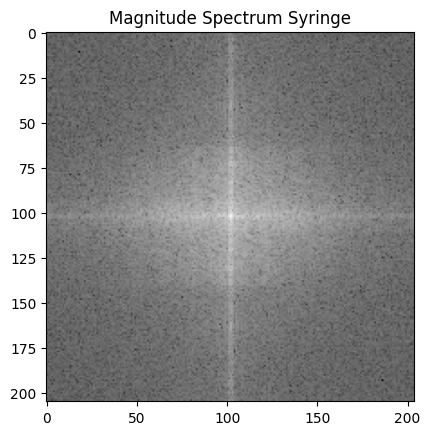

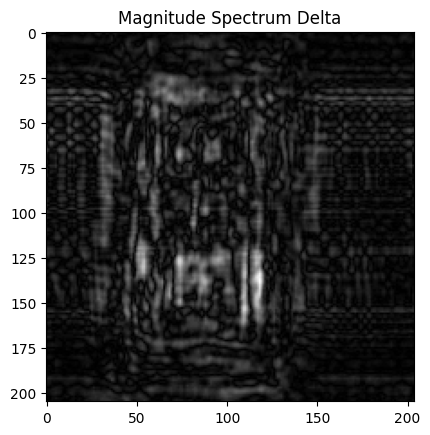

In [16]:
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = "/home/lollo/Pictures/Screenshots/Screenshot from 2025-02-18 21-59-09.png"
img_sirynge = "/home/lollo/Pictures/Screenshots/Screenshot from 2025-02-18 22-04-13.png"

img = "/home/lollo/Pictures/Screenshots/Screenshot from 2025-02-18 22-06-43.png"
img_sirynge = "/home/lollo/Pictures/Screenshots/Screenshot from 2025-02-18 22-07-26.png"

image = cv2.imread(img)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image_sirynge = cv2.imread(img_sirynge)
gray_sirynge = cv2.cvtColor(image_sirynge, cv2.COLOR_BGR2GRAY)


f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 1 * np.log(np.abs(fshift))

f_sirynge = np.fft.fft2(gray_sirynge)
fshift_sirynge = np.fft.fftshift(f_sirynge)
magnitude_spectrum_sirynge = 1 * np.log(np.abs(fshift_sirynge))

delta = fshift_sirynge - fshift
inv_delta = np.fft.ifftshift(delta)
inv_delta = np.fft.ifft2(inv_delta)
inv_delta = np.abs(inv_delta)

plt.imshow(gray, cmap='gray')
plt.title('Input Image')
plt.show()

plt.imshow(gray_sirynge, cmap='gray')
plt.title('Input Image Syringe')
plt.show()

plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

plt.imshow(magnitude_spectrum_sirynge, cmap='gray')
plt.title('Magnitude Spectrum Syringe')
plt.show()

plt.imshow(inv_delta, cmap='gray')
plt.title('Magnitude Spectrum Delta')
plt.show()



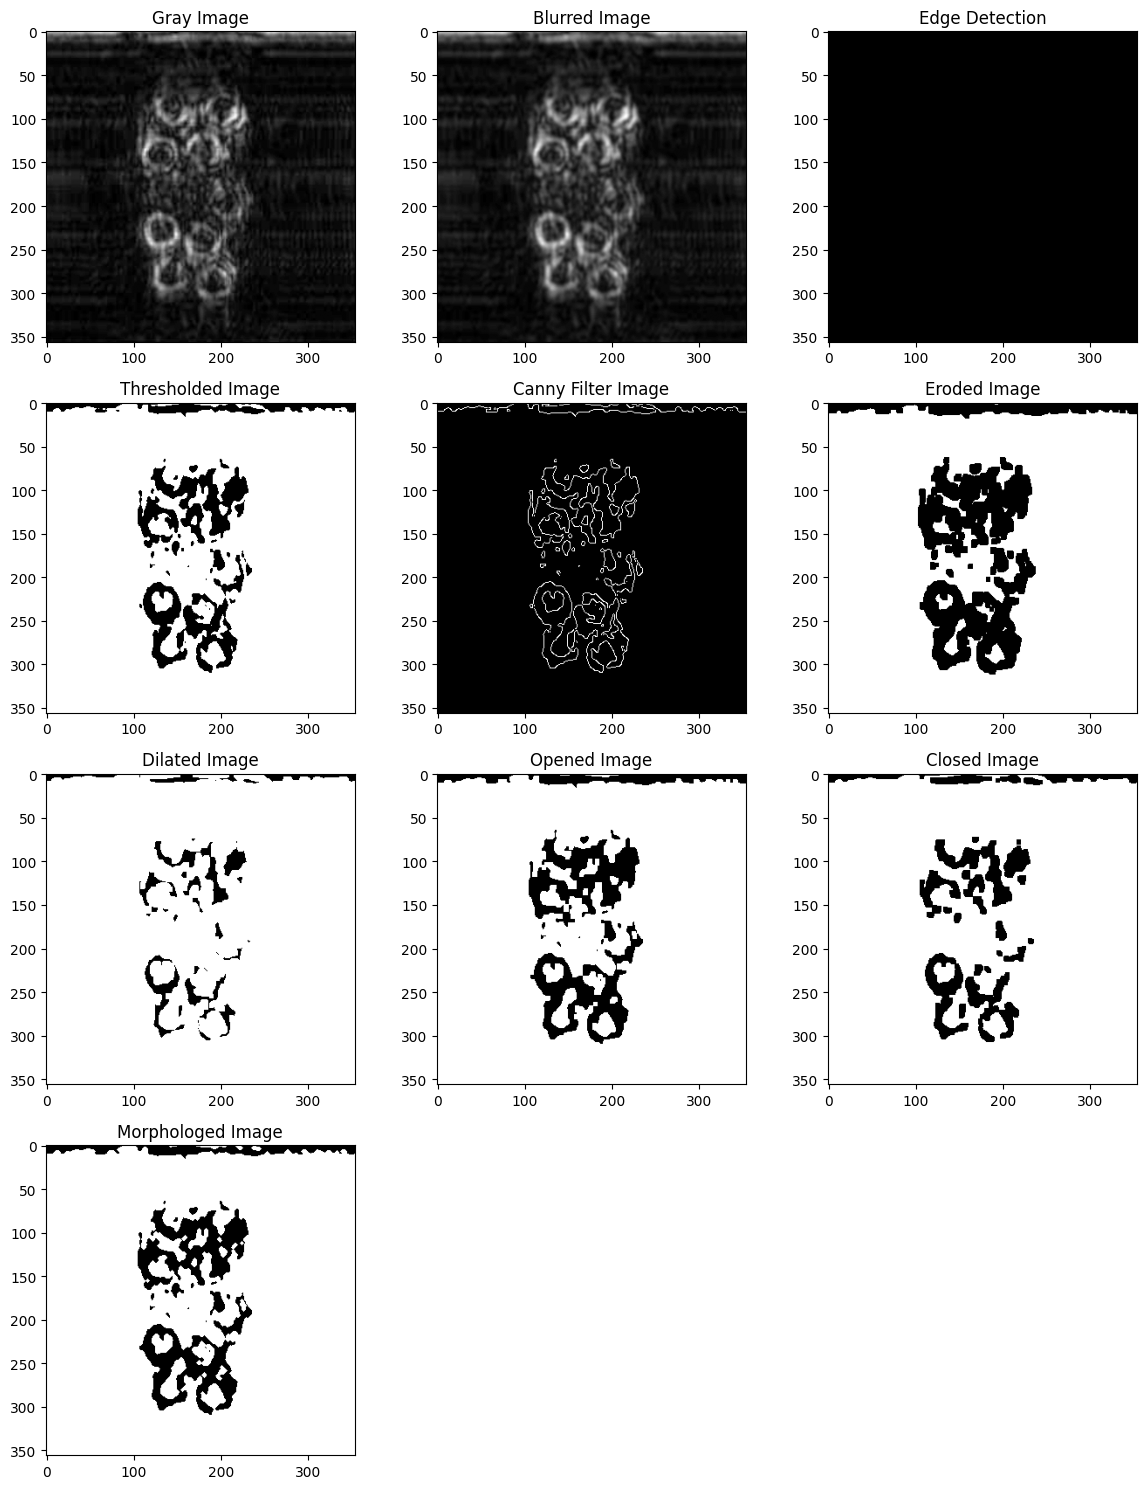

In [57]:
import cv2
import matplotlib.pyplot as plt
image_vials = "/home/lollo/Pictures/Screenshots/Screenshot from 2025-02-18 22-59-00.png"

# Assuming `image_vials` is your input image
image_vials = cv2.imread(image_vials)
gray_vials = cv2.cvtColor(image_vials, cv2.COLOR_BGR2GRAY)
blurred_vials = cv2.GaussianBlur(gray_vials, (5, 5), 0)

# Apply edge detection
edges_vials = cv2.Canny(blurred_vials, 20, 150)

# Apply thresholding
thresh_vials = cv2.adaptiveThreshold(blurred_vials, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)
_ , thresh_vials = cv2.threshold(blurred_vials, 20, 255, cv2.THRESH_BINARY_INV)

# Apply Canny filter
canny_filtered = cv2.Canny(thresh_vials, threshold1=10, threshold2=0)

# Apply morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

# Erosion
eroded_vials = cv2.erode(thresh_vials, kernel, iterations=1)

# Dilation
dilated_vials = cv2.dilate(thresh_vials, kernel, iterations=1)

# Opening (erosion followed by dilation)
opened_vials = cv2.morphologyEx(thresh_vials, cv2.MORPH_OPEN, kernel)

# Closing (dilation followed by erosion)
closed_vials = cv2.morphologyEx(thresh_vials, cv2.MORPH_CLOSE, kernel)

# Use morphological operations to remove small noise and separate overlapping vials
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
morphed = cv2.morphologyEx(thresh_vials, cv2.MORPH_OPEN, kernel, iterations=2)

# Display the images
plt.figure(figsize=(12, 15))

plt.subplot(4, 3, 1)
plt.imshow(gray_vials, cmap='gray')
plt.title('Gray Image')

plt.subplot(4, 3, 2)
plt.imshow(blurred_vials, cmap='gray')
plt.title('Blurred Image')

plt.subplot(4, 3, 3)
plt.imshow(edges_vials, cmap='gray')
plt.title('Edge Detection')

plt.subplot(4, 3, 4)
plt.imshow(thresh_vials, cmap='gray')
plt.title('Thresholded Image')

plt.subplot(4, 3, 5)
plt.imshow(canny_filtered, cmap='gray')
plt.title('Canny Filter Image')

plt.subplot(4, 3, 6)
plt.imshow(eroded_vials, cmap='gray')
plt.title('Eroded Image')

plt.subplot(4, 3, 7)
plt.imshow(dilated_vials, cmap='gray')
plt.title('Dilated Image')

plt.subplot(4, 3, 8)
plt.imshow(opened_vials, cmap='gray')
plt.title('Opened Image')

plt.subplot(4, 3, 9)
plt.imshow(closed_vials, cmap='gray')
plt.title('Closed Image')

plt.subplot(4, 3, 10)
plt.imshow(morphed, cmap='gray')
plt.title('Morphologed Image')

plt.tight_layout()
plt.show()

In [36]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load a pre-trained YOLOv5 model
model = YOLO('yolov5su.pt', verbose=True)  # You can choose different model sizes (e.g., yolov5m.pt, yolov5l.pt, yolov5x.pt)

In [40]:
def detect_objects(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(blurred_vials, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model(image_rgb)
    results[0].show()
    results

# Example usage
detect_objects(img_vials)


0: 640x640 1 cat, 11.9ms
Speed: 7.4ms preprocess, 11.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/lollo/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [ ]:
import cv2
import numpy as np
import torch, torchvision
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.utils.visualizer import Visualizer

# Configure Detectron2 for instance segmentation with Mask R-CNN
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Assuming vials are the only object class
cfg.MODEL.WEIGHTS = "path/to/your/trained/model.pth"  # Path to the fine-tuned weights
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Confidence threshold for detection

predictor = DefaultPredictor(cfg)

# Read the image
image = cv2.imread("path/to/your/image.jpg")
outputs = predictor(image)

# Extract detected instances and count them
instances = outputs["instances"].to("cpu")
vial_count = len(instances.pred_masks)  # Number of detected vials

print(f"Detected number of vials: {vial_count}")

# Optional: visualize detections
v = Visualizer(image[:, :, ::-1], scale=1.0)
result = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2.imshow("Detections", result.get_image()[:, :, ::-1])
cv2.waitKey(0)
